In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


## 1. Introducción:

En este notebook, realizaremos un Análisis Exploratorio de Datos (EDA) de un dataset que contiene información sobre películas y series de Netflix.  
Exploraremos la estructura de los datos, limpiaremos valores faltantes, analizaremos tendencias y realizaremos visualizaciones clave.  

## 2. Importación de Librerías y Carga de Datos:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos y mostrar primeras filas
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Exploración inicial de los datos:

Procederemos a ver:
* cantidad de filas y columnas
* tipo de datos
* buscar nulos y duplicados



In [3]:
# De aqui podemos obtener informacion del tipo de datos, filas y columnas y tambien analizar donde estan los valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Analizamos donde estan y cuantos son los  valores nulos
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Valores duplicados
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool>

## 4. Limpieza y preparación de datos:

In [6]:
# Rellenar valores faltantes en 'date_added'y rating con el más frecuente
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Reasignacion de valores faltantes en columnas categoricas
df = df.fillna({
    'director' : 'Unknown',
    'cast': 'Unknown',
    'duration' : 'Unknown',
    'country': 'Unknown',   
})


In [7]:
# Revisamos como queda la imputacion de valores nulos
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 5. Analisis y visualizacion de datos:

A continuación se visualizan los datos para entender a mas profundidad los datos

### 📌 Distribucion de titulos por año de adición

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


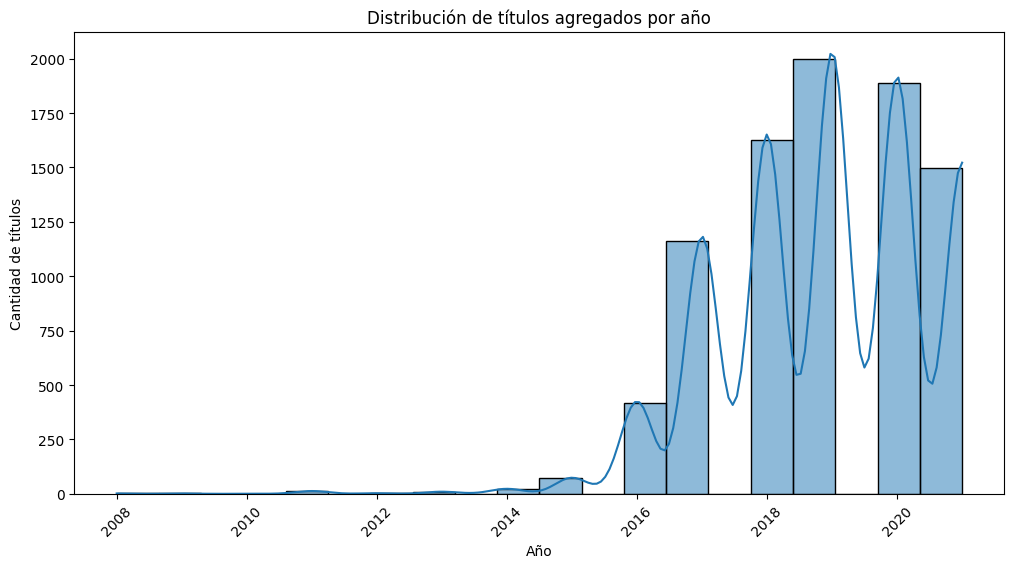

In [8]:
# Convertir 'date_added' a datetime, ignorando valores inválidos
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer el año
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.histplot(df['year_added'].dropna(), bins=20, kde=True)
plt.title("Distribución de títulos agregados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()



### 🎭 Top 10 Géneros Más Populares

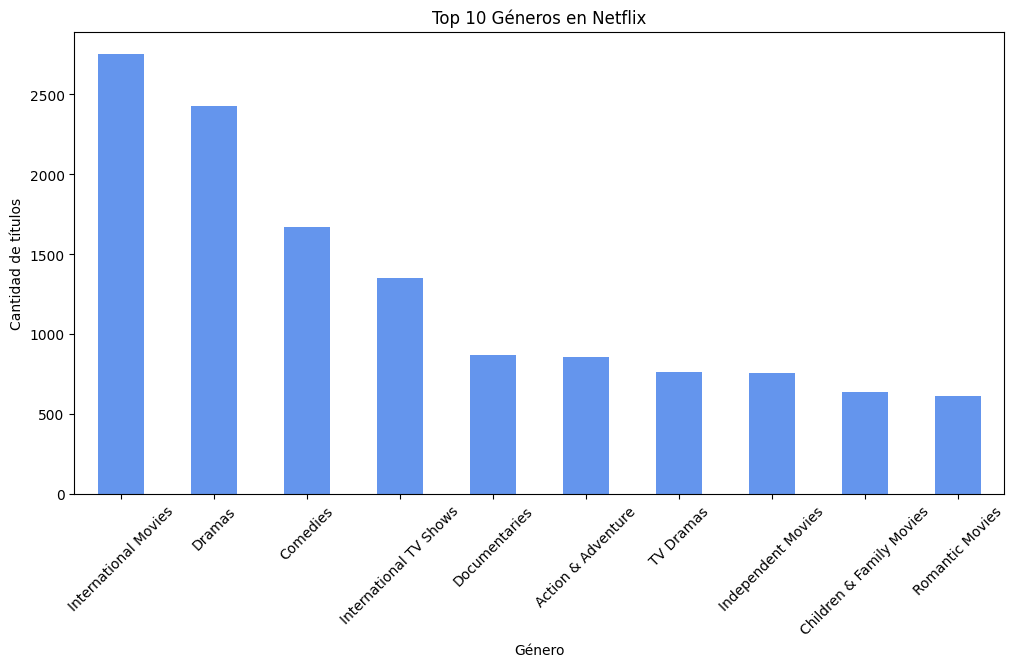

In [9]:
plt.figure(figsize=(12,6))
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='bar', color='cornflowerblue')
plt.title("Top 10 Géneros en Netflix")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()


### 🎬 Distribución de duración de películas

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


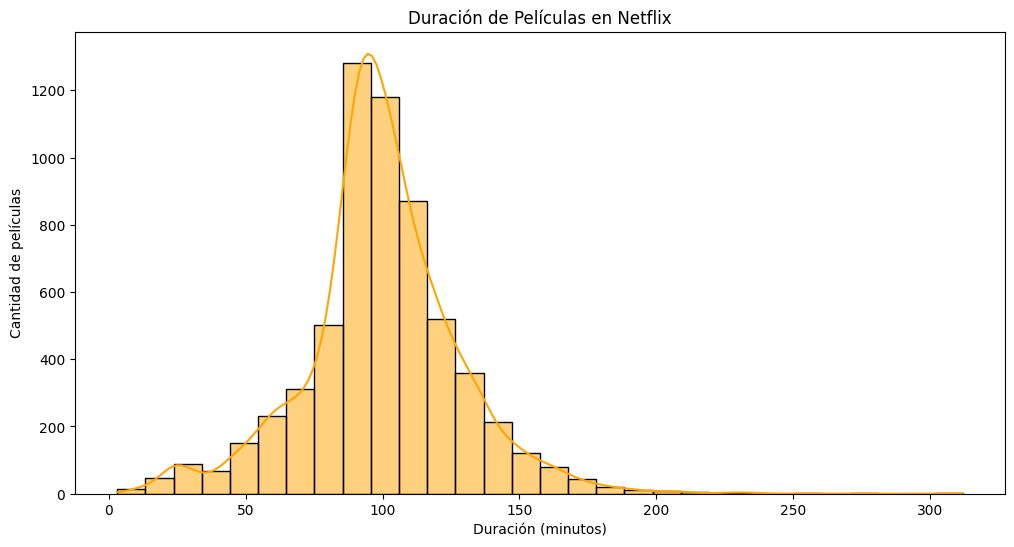

In [10]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].replace('Unknown', np.nan)

df_movies['duration'] = df_movies['duration'].str.replace(' min', '', regex=False).astype(float)

plt.figure(figsize=(12,6))
sns.histplot(df_movies['duration'].dropna(), bins=30, kde=True, color='orange')
plt.title("Duración de Películas en Netflix")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad de películas")
plt.show()


### 🌍 Top 10 países con más títulos Distribución de películas y series en Netflix 🎬📺

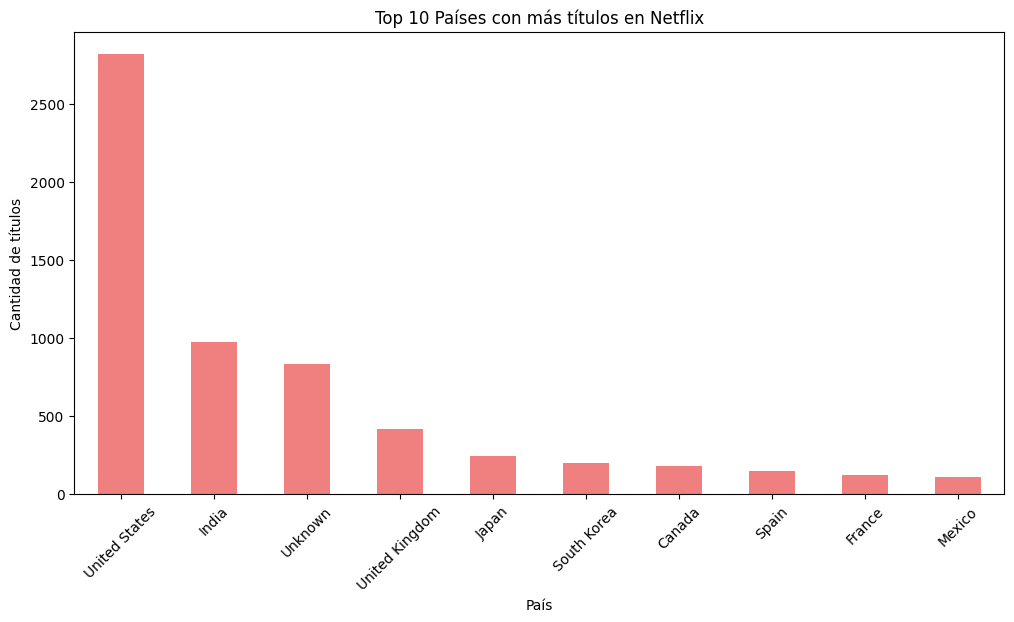

In [11]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Países con más títulos en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()


 ### 🎬📺 Distribución de películas y series en Netflix 

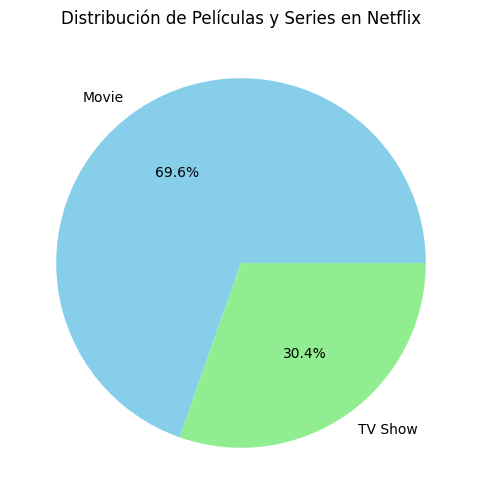

In [12]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Distribución de Películas y Series en Netflix")
plt.ylabel("")
plt.show()


###  📅🎥 Cantidad de Temporadas en Netflix

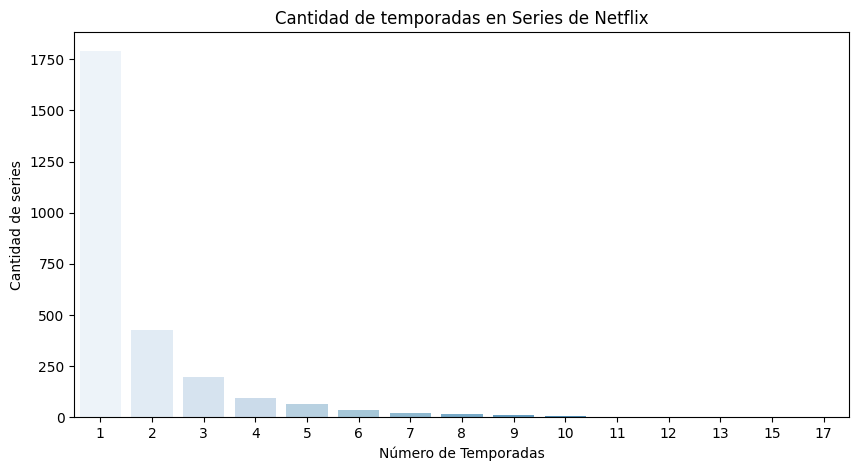

In [13]:
df_series = df[df['type'] == 'TV Show'].copy()
df_series['duration'] = df_series['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

plt.figure(figsize=(10,5))
sns.countplot(x=df_series['duration'], palette='Blues')
plt.title("Cantidad de temporadas en Series de Netflix")
plt.xlabel("Número de Temporadas")
plt.ylabel("Cantidad de series")
plt.show()


## 6 . Conclusiones e insights:

*Top 10 Países con Más Títulos 🌍:*

Distribución de títulos: Los países con más títulos en Netflix tienden a ser aquellos con mayor presencia en la plataforma, como Estados Unidos, India y Reino Unido, lo cual refleja la expansión global de la plataforma y su diversidad de contenido. Es importante destacar que algunos países tienen una mayor concentración de títulos debido a su industria cinematográfica y televisiva más desarrollada.
Posibles implicaciones: El alto número de títulos en ciertos países puede ser un reflejo de las alianzas estratégicas de Netflix con productores locales, lo que permite una mayor oferta en estos mercados. Además, puede indicar una fuerte demanda de contenido producido en estos países.

*Duración de Películas en Netflix ⏳:*

Películas más cortas y largas: La mayoría de las películas en Netflix tienen una duración promedio de entre 90 y 120 minutos. Sin embargo, también se observa una pequeña proporción de películas mucho más largas, lo cual podría reflejar la diversificación del catálogo para atender a diferentes audiencias, incluidas las que prefieren películas épicas o documentales largos.

*Distribución de Cantidad de Temporadas en Series 📅🎥:*

Tendencia de temporadas por serie: La mayoría de las series en Netflix parecen tener entre 1 y 5 temporadas, lo que podría reflejar una estrategia de producción de series relativamente cortas pero con un contenido muy dirigido a las audiencias. Sin embargo, se observan también algunas series de gran duración, lo que puede indicar que algunas series exitosas tienen un mayor número de temporadas debido a su popularidad.
Implicaciones de mercado: Las series más largas probablemente sean aquellas que han logrado una base de fans leal y han sido renovadas debido a su éxito, lo que contribuye a la variedad y fidelización de los suscriptores.

